In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

breast_cancer

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
    breast_cancer.data, breast_cancer.target, random_state=0) 

In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier() 
mlp.fit(X_train, y_train) 
 
print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)))

Правильность на обучающем наборе: 0.94
Правильность на тестовом наборе: 0.93


In [ ]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

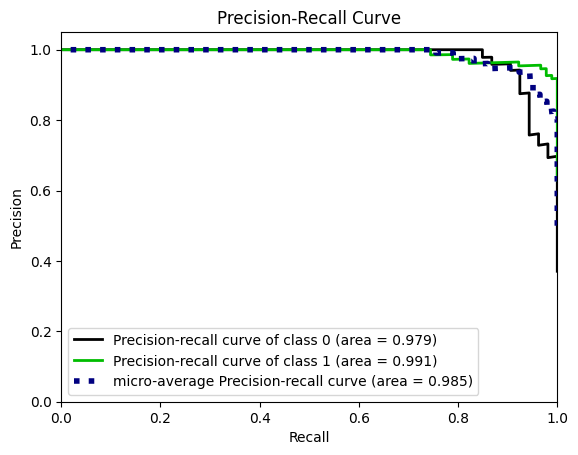

In [8]:
y_probas = mlp.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show();

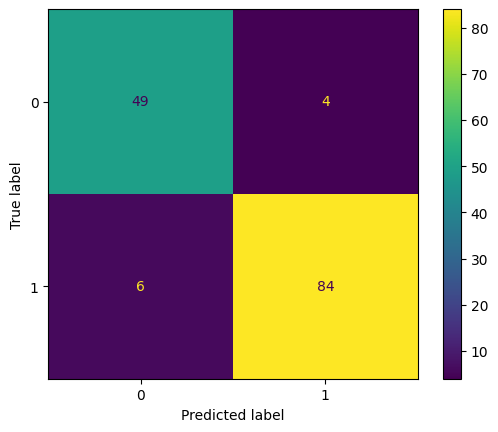

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

predictions = mlp.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probas[:, 1])

0.9846960167714884

In [27]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_probas[:, 1])

0.990517019009148

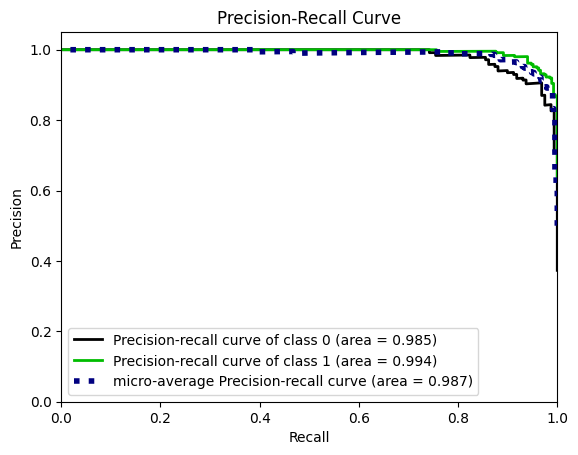

In [31]:
y_probas2 = mlp.predict_proba(X_train)
skplt.metrics.plot_precision_recall(y_train, y_probas2)
plt.show();

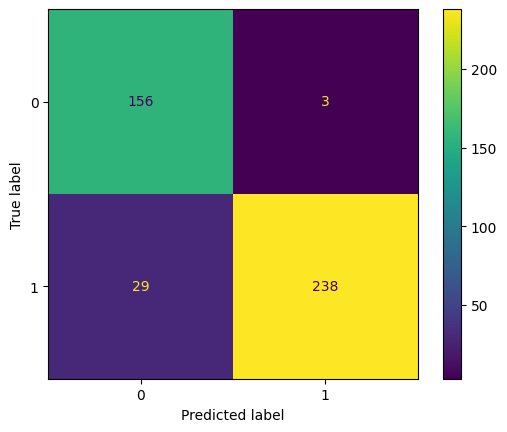

In [67]:
predictions2 = mlp.predict_proba(X_train)
sdvig = 0.24 # Ползунок для сдвига на опр. коэффициент 
predictions2 = (predictions2 - sdvig).round().astype('int8')[:, 1]
cm = confusion_matrix(y_train, predictions2, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

In [70]:
import numpy as np

X = breast_cancer.data
y = breast_cancer.target
n_samples, n_features = X.shape
random_state = np.random.RandomState(0)
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

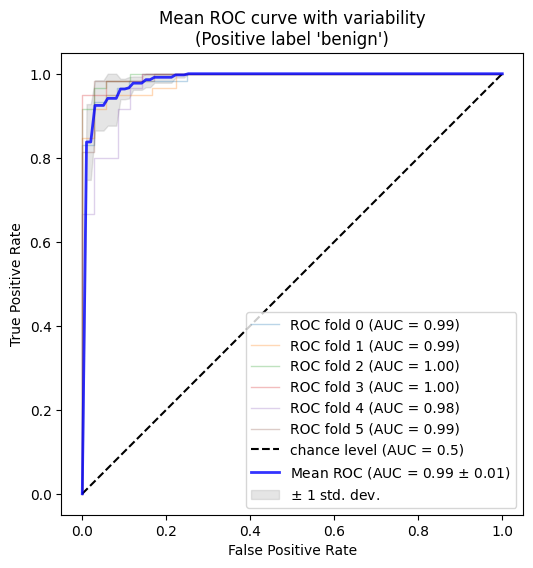

In [73]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label '{breast_cancer.target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

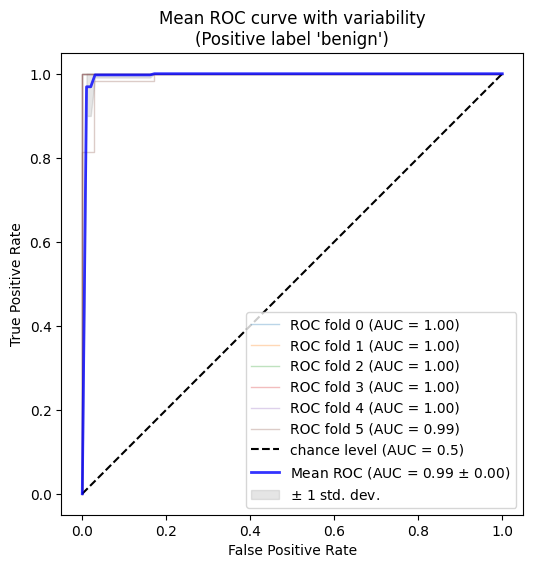

In [74]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=6)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    mlp.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label '{breast_cancer.target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

In [90]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split( 
    breast_cancer.data, breast_cancer.target, random_state=0) 

svc = svm.SVC(probability=True) 
svc.fit(X_train, y_train) 
 
print("Правильность на обучающем наборе: {:.2f}".format(svc.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(svc.score(X_test, y_test)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.94


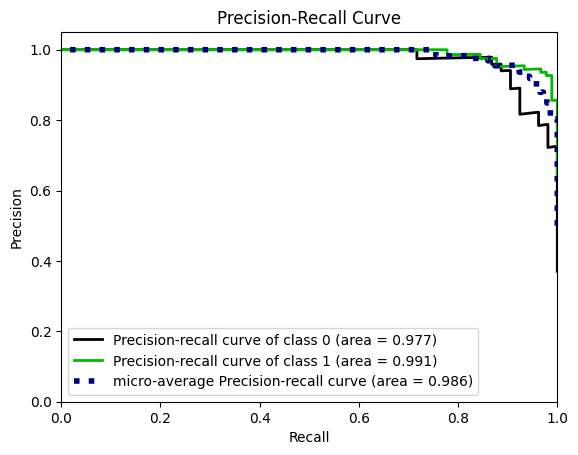

In [94]:
y_probas2 = svc.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas2)
plt.show();

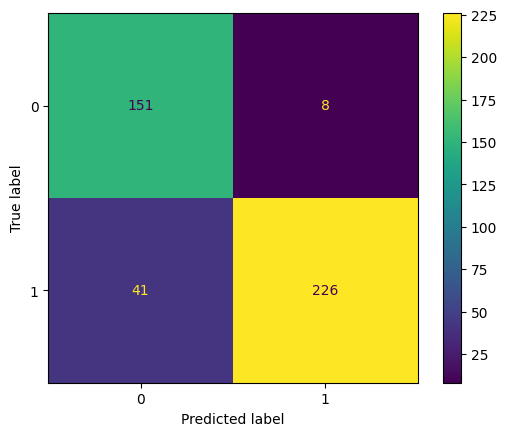

In [96]:
predictions2 = svc.predict_proba(X_train)
sdvig = 0.34 # Ползунок для сдвига на опр. коэффициент 
predictions2 = (predictions2 - sdvig).round().astype('int8')[:, 1]
cm = confusion_matrix(y_train, predictions2, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()